In [1]:
# ------------------ Project: Efficient Data Stream Anomaly Detection ------------------
# Description:
# This project implements an anomaly detection algorithm using Isolation Forest to detect 
# anomalies in a continuous data stream. The data stream simulates real-time sequences of 
# floating-point numbers, which could represent various metrics such as financial transactions 
# or system metrics. The main goal is to identify unusual patterns, such as exceptionally high 
# values or deviations from the norm, in real-time.
#
# Algorithm Used:
# Isolation Forest is a well-known anomaly detection algorithm that isolates observations 
# by randomly selecting a feature and then randomly selecting a split value between the 
# maximum and minimum values of the selected feature. This process is repeated until all points 
# are isolated. The number of splits required to isolate a point is an indicator of how anomalous 
# the point is: the fewer splits required, the more likely it is an anomaly.
#
# Requirements:
# - Python 3.x
# - Libraries: numpy, matplotlib, scikit-learn
# --------------------------------------------------------------------------------------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from collections import deque

In [3]:
def validate_data(data):
    """
    Validates the input data to ensure it meets the required format and structure.

    Parameters:
    data (numpy.array): Array of numeric values representing the data stream.

    Raises:
    ValueError: If the data contains NaN values or non-numeric entries.
    """
    # التحقق من وجود قيم مفقودة
    if np.any(np.isnan(data)):
        raise ValueError("Missing values detected in the data!")
    
    # التحقق من أن البيانات عبارة عن قائمة من القيم الرقمية
    if not all(isinstance(value, (int, float)) for value in data):
        raise ValueError("Ensure that all values in the data are numeric.")

In [4]:
# -------------------------- Step 2: Generate Data Stream --------------------------
def generate_data_stream(length=1000, noise_level=0.2, anomaly_indices=None):
    """
    Generates a simulated data stream with seasonal patterns, random noise, and optional anomalies.

    Parameters:
    length (int): Length of the data stream.
    noise_level (float): Standard deviation of the random noise.
    anomaly_indices (list): List of indices where anomalies should be introduced.

    Returns:
    numpy.array: Generated data stream.
    """
    data_stream = []
    for i in range(length):
        seasonal_pattern = np.sin(i * np.pi / 50)  # نمط موسمي
        noise = np.random.normal(0, noise_level)  # إضافة ضجيج عشوائي
        value = seasonal_pattern + noise
        # إضافة شذوذ عند الفهارس المحددة إذا كانت معطاة
        if anomaly_indices and i in anomaly_indices:
            value *= 5  # تضخيم القيمة لتكون شذوذًا
        data_stream.append(value)
    return np.array(data_stream)

In [5]:
# -------------------------- Step 3: Anomaly Detection Using Isolation Forest --------------------------
def detect_anomaly_isolation_forest(data):
    """
    Detects anomalies in the given data using Isolation Forest.

    Parameters:
    data (numpy.array): Array of numeric values representing the data stream.

    Returns:
    list: List of tuples containing the index and value of detected anomalies.
    """
    model = IsolationForest(contamination=0.05, random_state=42)
    model.fit(data.reshape(-1, 1))
    predictions = model.predict(data.reshape(-1, 1))
    # تُعد النقاط الشاذة هي التي تم توقعها بالقيمة -1
    anomalies = [(index, value) for index, value in enumerate(data) if predictions[index] == -1]
    return anomalies

In [6]:
# -------------------------- Step 4: Real-Time Anomaly Detection with Sliding Window --------------------------
def real_time_anomaly_detection(data_stream, window_size=50, step_size=10):
    """
    Performs real-time anomaly detection on a data stream using a sliding window.

    Parameters:
    data_stream (numpy.array): Array of numeric values representing the data stream.
    window_size (int): Size of the sliding window.
    step_size (int): Step size for moving the window.

    Returns:
    list: List of detected anomalies.
    """
    rolling_window = deque(maxlen=window_size)
    anomalies = []

    # بناء النموذج الأولي للنقاط الأولية
    initial_window_data = data_stream[:window_size]
    model = IsolationForest(contamination=0.05, random_state=42)
    model.fit(initial_window_data.reshape(-1, 1))

    # تحليل البيانات بشكل تفاعلي
    for i in range(window_size, len(data_stream), step_size):
        rolling_window.extend(data_stream[i-step_size:i])
        window_data = np.array(rolling_window)
        predictions = model.predict(window_data.reshape(-1, 1))
        current_anomalies = [(i - step_size + j, window_data[j]) for j in range(len(predictions)) if predictions[j] == -1]
        anomalies.extend(current_anomalies)
    return anomalies

In [7]:
# -------------------------- Step 5: Visualization --------------------------
def plot_data_with_anomalies(data, anomalies):
    """
    Visualizes the data stream along with detected anomalies.

    Parameters:
    data (numpy.array): Array of numeric values representing the data stream.
    anomalies (list): List of tuples containing the index and value of detected anomalies.
    """
    plt.figure(figsize=(15, 6))
    plt.plot(data, label='Data Stream', color='blue')
    if anomalies:
        anomaly_indices, anomaly_values = zip(*anomalies)
        plt.scatter(anomaly_indices, anomaly_values, color='red', label='Anomalies', marker='x')
    plt.title('Data Stream with Anomalies')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

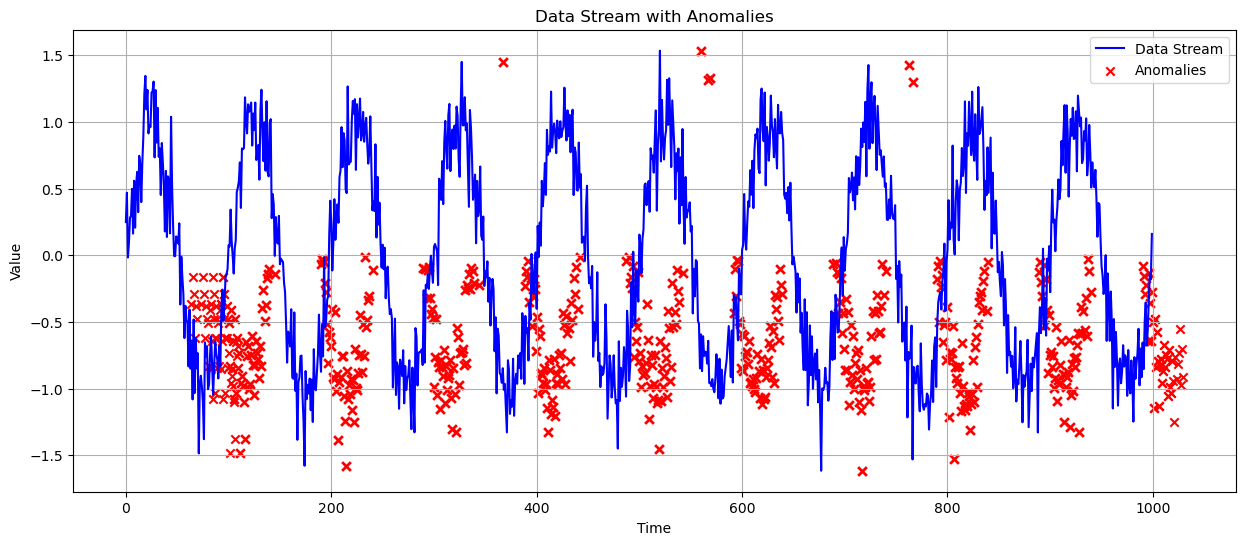

In [8]:
# -------------------------- Step 6: Run the Complete Project --------------------------
# Generate Data
data_stream = generate_data_stream(anomaly_indices=[100, 300, 700])
validate_data(data_stream)

# Detect Anomalies in Real-Time
anomalies = real_time_anomaly_detection(data_stream)

# Visualize Results
plot_data_with_anomalies(data_stream, anomalies)

In [9]:
# -------------------------- Step 7: Create Requirements File --------------------------
# Save required libraries to a file for easy setup
with open("requirements.txt", "w") as f:
    f.write("numpy\nmatplotlib\nscikit-learn\n")

In [10]:
# إنشاء ملف README.md وكتابة المحتوى الأولي فيه
with open("README.md", "w", encoding="utf-8") as file:
    file.write("# Efficient Data Stream Anomaly Detection\n\n")
    file.write("## Project Description\n")
    file.write("This project implements a real-time anomaly detection algorithm using Isolation Forest. "
               "It simulates a data stream with seasonal patterns, noise, and anomalies, and detects "
               "unusual points using a sliding window approach.\n\n")
    
    file.write("## Requirements\n")
    file.write("- Python 3.x\n")
    file.write("- Libraries: `numpy`, `matplotlib`, `scikit-learn`\n\n")
    
    file.write("## How to Run\n")
    file.write("1. Install the required libraries using the following command:\n")
    file.write("   ```\n   pip install -r requirements.txt\n   ```\n")
    file.write("2. Run the project file in Jupyter Notebook or any Python IDE.\n\n")
    
    file.write("## Project Structure\n")
    file.write("```\n")
    file.write("├── project.ipynb         # Main Jupyter Notebook file\n")
    file.write("├── README.md             # Project documentation\n")
    file.write("├── requirements.txt      # Dependencies file\n")
    file.write("```\n\n")
    
    file.write("## Results\n")
    file.write("The detected anomalies are visualized in the graph, where normal data points are shown in blue, "
               "and anomalies are marked in red.\n\n")
    
    file.write("## Algorithm Used\n")
    file.write("Isolation Forest is a well-known anomaly detection algorithm that isolates observations by "
               "randomly selecting a feature and then randomly selecting a split value between the maximum "
               "and minimum values of the selected feature. The fewer splits required to isolate a point, "
               "the more likely it is an anomaly.\n\n")
    
    file.write("## License\n")
    file.write("This project is licensed under the MIT License.\n")
